<a href="https://colab.research.google.com/github/harshith187/Exploratory-Data-Analysis-of-Car-Features/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Car Features**

As a data scientist, the majority of your time will be spent on data pre-processing i.e. making sure you have the right data in the right format. Once this is done, you get a sense of your dataset through applying some descriptive statistics and then, you move on to the exploration stage wherein you plot various graphs and mine the hidden insights. In this project, you as a data scientist are expected to perform Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.


### 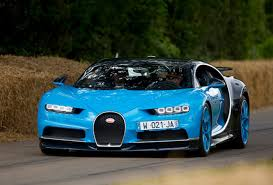

*The objective of the project is to do data pre-processing and exploratory data analysis of the dataset*

## **Data Description**

In [1]:
# Make                Car Make
# Model               Car Model
# Year                Car Year (Marketing)
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price

**1.1 Import the necessary libraries**

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1.2 import the data and take a look at it's top 5 rows**

In [3]:
car_feature_data = pd.read_csv('/content/drive/My Drive/data.csv')
car_feature_data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**1.3 Data structure**

Now lets see the datatypes and if there are any null values in the dataset


In [4]:
car_feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

From the above output we can see that the columns of dataset are made of different datatypes like object, float, int.
We can also see that there are null values in 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category'

Now we'll see a clear cut look and count of null values

In [5]:
car_feature_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

From the above output we can see the null value counts of different columns

Now let's see the statistical summary of the dataset using describe() function and the shape of the dataframe


In [6]:
car_feature_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
car_feature_data.shape

(11914, 16)

## **2. Drop irrelevant columns**

In the dataset we can see that there are irrelevant columns that do not make much difference in the prediction! so it would be better to drop those columns, this also saves the computational time.

Number of doors in a car will not make difference in the prediction, because most of the cars have 4 doors. Similarly the Engine Fuel Type and the Market Category

In [8]:
car_feature_data.drop(columns = ['Engine Fuel Type','Number of Doors','Market Category'],axis=1,inplace=True)
car_feature_data.shape

(11914, 13)

We can see that the size of the  dataframe is reduced.It says the columns are removed succesfully

## **3. Rename columns**

Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"


In [9]:
car_feature_data = car_feature_data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
car_feature_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## **4. Check for duplicate and missing values**


**4.1** **Check and remove duplicates**

 An important part of Data analysis is analyzing Duplicate Values and removing them. Lets check for the duplicate data in the dataset and remove them, because they are not going to help our model as training a model with the same data makes no sence. Pandas duplicated() method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements.

In [10]:
print('There are ',car_feature_data.duplicated().sum(),' duplicate rows in the dataset')
car_feature_data.drop_duplicates(keep='first',inplace=True)
print('Duplicates count after removing the duplicates ',car_feature_data.duplicated().sum())

There are  792  duplicate rows in the dataset
Duplicates count after removing the duplicates  0


From the above output we can see that all the duplicate rows in dataset is removed

**4.2** 
**Check for missing values and remove that row**

 Now we'll check for the missing values and remove those rows. Missing Data is a very big problem in real life scenario. Missing Data can also refer to as NA(Not Available) values. Machine learning and data mining face severe issues in the accuracy of their model predictions because of poor quality of data caused by missing values. In these areas, missing value treatment is a major point of focus to make their models more accurate and valid

In [11]:
car_feature_data.dropna(inplace=True)
car_feature_data.shape

(11024, 13)

The output says that the dataframe size is reduced which means the rows with null values are removed succesfully

## **5. Detecting Outliers**

Outliers are the set of points which are different from other commenly occuring data. Those points lie far away and effect the model's performance. So it would be a good practice to detect and remove the outliers. Now i'am going to use IQR technique to remove the outliers

**5.1** **Plot and check for outliers**

With the complex set of data box plot would be a better choice for visualising data.
Know lets plot graphs of various columns to check for outliers

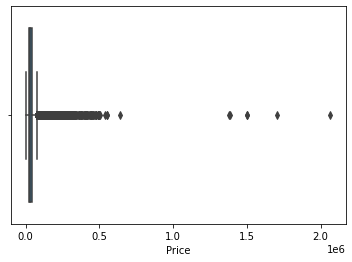

In [12]:
sns.boxplot(x = car_feature_data['Price'])

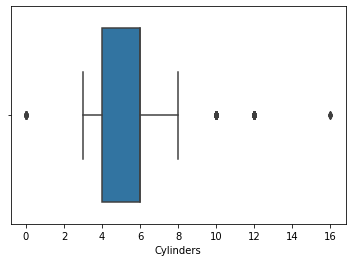

In [13]:
sns.boxplot(x=car_feature_data['Cylinders'])

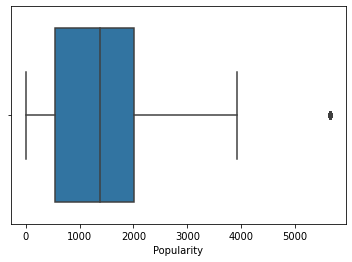

In [14]:
sns.boxplot(x=car_feature_data['Popularity'])

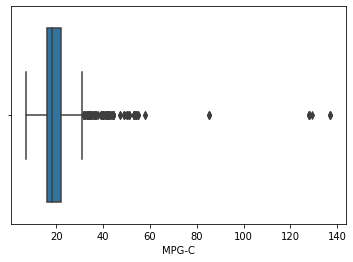

In [15]:
sns.boxplot(x=car_feature_data['MPG-C'])

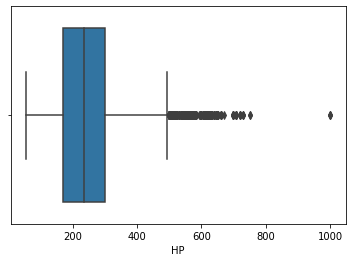

In [16]:
sns.boxplot(x=car_feature_data['HP'])

From the diagrams we can see that there are many outliers which has to be removed

**5.2** **Remove outliers**

Now lets remove the outliers by IQR technique

In [17]:
Q1 = car_feature_data.quantile(0.25)
Q3 = car_feature_data.quantile(0.75)
IQR = Q3 - Q1
car_feature_data = car_feature_data[~((car_feature_data < (Q1 - 1.5 * IQR)) |(car_feature_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
car_feature_data.shape


(8546, 13)

By this we can see lot of outlying rows have been removed

## **6. Most represented car brands in the dataset and average price among the top car brands**

**6.1** **Let's list out top 10 most represented car brands in the dataset**

In [19]:
car_feature_data['Make'].value_counts()[:10]

Chevrolet     1027
Toyota         569
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          378
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64

**6.2** **The average pricing among the top 10 represented brand**

In [20]:
prices = car_feature_data[['Make','Price']].loc[(car_feature_data['Make'] == 'Chevrolet')|
               (car_feature_data['Make'] == 'Chevrolet')|
               (car_feature_data['Make'] == 'Toyota')|
               (car_feature_data['Make'] == 'Volkswagen')|
               (car_feature_data['Make'] == 'Nissan')|
               (car_feature_data['Make'] == 'GMC')|
               (car_feature_data['Make'] == 'Dodge')|
               (car_feature_data['Make'] == 'Mazda')|
               (car_feature_data['Make'] == 'Honda')|
               (car_feature_data['Make'] == 'Suzuki')|
               (car_feature_data['Make'] == 'Infiniti')].groupby('Make').mean()
prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


This gives the average pricing among the top represented car brands. 

## **7. Correlation matrix**

Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 
A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [21]:
car_feature_data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


We can use heatmap for deeper analysis because, seaborn heatmaps are appealing to the eyes, and they tend to send clear messages about data almost immediately. This is why this method for correlation matrix visualization is widely used by data analysts and data scientists alike

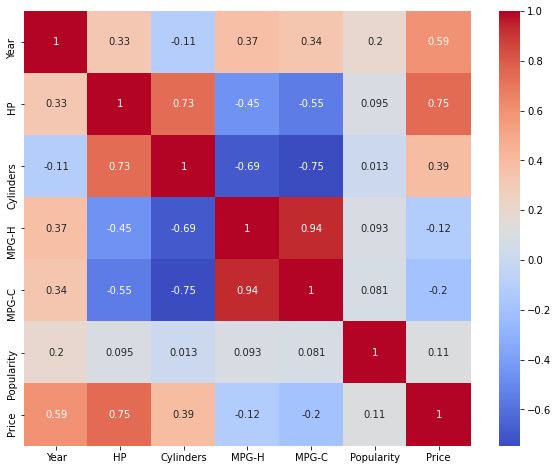

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(car_feature_data.corr(), annot = True, cmap= 'coolwarm')

**High correlation between**

--MPG-H and MPG-C (0.94)

So we can say that MPG-H and MPG-C are highly correlated. As the MPG-H increases the MPG-C also increases with the same trend

**High anticorrelation between**

-- Cylinders and MPG-C (-0.75)

So we can say that Cylinders and MPG-C are highly anticorrelated. As the MPG-H increases the MPG-C decreases with the same trend

These anticorrelation and correlation are reasonable so there is noo need of feature removal


## **8. Perform EDA and plot different graphs and document**

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. In my own words, it is about knowing your data, gaining a certain amount of familiarity with the data, before one starts to extract insights from it.Since EDA is such a crucial initial step for all data science projects.

EDA is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) like:

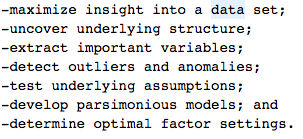

Now lets perform some data preprocessing 


**8.1** **Encode the dataset**

In the dataset we can see that there are lot of non-numeric columns. We should get rid of such data because many of the algorithms do not support categorical data, python tools of pandas and scikit-learn provide several approaches that can be applied to transform the categorical data into suitable numeric values. In this notebook we are using Label Encoder to convert into suitable numeric values. 

In [23]:
car_feature_data_old = car_feature_data.copy()
label_encoder = LabelEncoder()
for column in car_feature_data:
    if car_feature_data[column].dtype == 'object':
        car_feature_data[column] = label_encoder.fit_transform(car_feature_data[column])
car_feature_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


From the above output we can see that all the catogorical values have been converted to numeric values

**8.2** **Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

2 most important scalling techniques are *Min-Max Normalization* and *Standardization*

In this we are using Standardization. We'll use StandardScaler from sklearn. It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1

In [24]:
standard_scaler = StandardScaler()
car_feature_data_scalled =  standard_scaler.fit_transform(car_feature_data)
car_feature_data_scalled[:5,:]

array([[-1.28350756, -1.64434287, -0.04159785,  1.30513235,  0.45501994,
         1.70365672,  1.21513824, -1.12126966, -0.05984543, -0.13111318,
        -0.1091675 ,  3.13678811,  1.00619211],
       [-1.28350756, -1.64945719, -0.04159785,  0.85040587,  0.45501994,
         1.70365672,  1.21513824, -1.12126966, -0.46430497,  0.22313697,
        -0.1091675 ,  3.13678811,  0.64395311],
       [-1.28350756, -1.64945719, -0.04159785,  0.85040587,  0.45501994,
         1.70365672,  1.21513824, -1.12126966, -0.05984543,  0.22313697,
         0.12164533,  3.13678811,  0.35997359],
       [-1.28350756, -1.64945719, -0.04159785, -0.05904709,  0.45501994,
         1.70365672,  1.21513824, -1.12126966, -0.05984543,  0.22313697,
        -0.33998034,  3.13678811, -0.09571448],
       [-1.28350756, -1.64945719, -0.04159785, -0.05904709,  0.45501994,
         1.70365672,  1.21513824, -1.12126966, -0.46430497,  0.22313697,
        -0.33998034,  3.13678811,  0.23779635]])

The above output shows the top 5 rows of the dataset, here we can see that all the data points are in a fixed range

**8.3** **Plot different graphs and document**

There are a number of tools that are useful for EDA, but EDA is characterized more by the attitude taken than by particular techniques.

Typical graphical techniques used in EDA are:

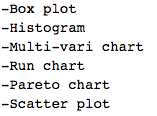



Now lets plot graphs on different to see how other
variables affect the price of the car

**8.3.1** **Year-price graph**

Text(0, 0.5, 'Price')

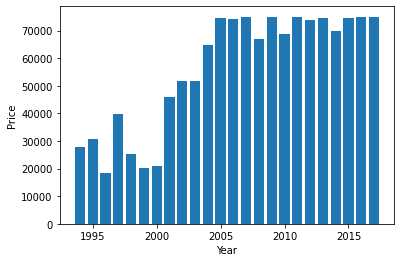

In [25]:
plt.bar(car_feature_data['Year'],car_feature_data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')

From the above graph we can analyse that car prices before 2005 was reasonably low, this is be because of technology available at that period, employement,developement, etc

So from this we can say that year plays an important role price values

**8.3.2** **HP - Price graph**

Text(0, 0.5, 'Price')

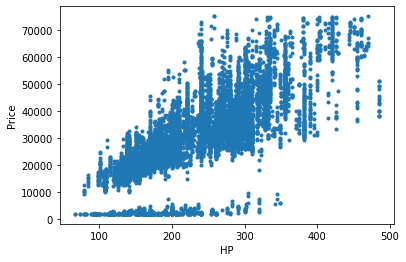

In [26]:
plt.scatter(car_feature_data['HP'],car_feature_data['Price'],marker='.')
plt.xlabel('HP')
plt.ylabel('Price')

From the above graph we can see that as the HP is increased the price of the car is also increaseed. This is because to produce cars with greater horse power more powerfull engine is required which would be of higher price.We can easily draw a trend line for this.

So from this we can observe that HP is plays an important role price values

**8.3.3** **HP - Cylinders Bar graph**

Text(0, 0.5, 'HP')

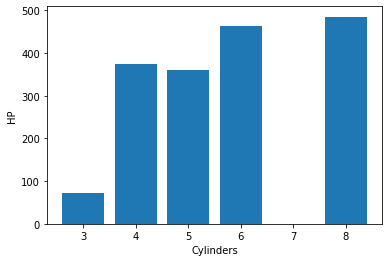

In [27]:
plt.bar(car_feature_data['Cylinders'],car_feature_data['HP'])
plt.xlabel('Cylinders')
plt.ylabel('HP')

Here we can see that when No of cylinders is increased the HP is also increased

**8.3.4** **Make - AVG Price graph**

Text(0, 0.5, 'AVG-Price')

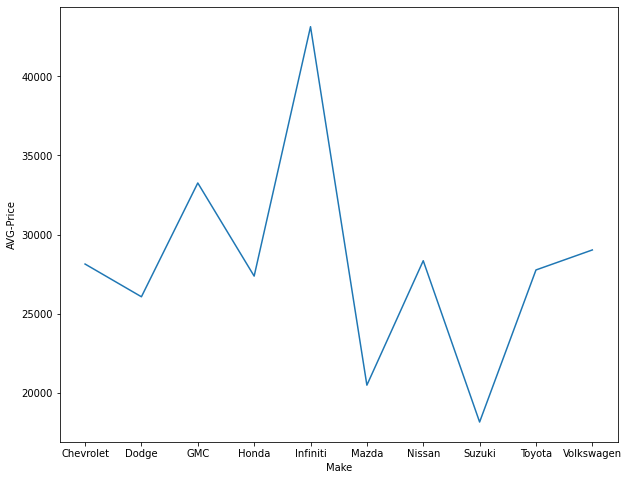

In [28]:
plt.figure(figsize=(10,8))
plt.plot(prices)
plt.xlabel('Make')
plt.ylabel('AVG-Price')


Here we can see that there are many ups and down in the graph, it says that different car company have different pricing range, the price range of different car brands depends upon their standards and built qualty, etc.

By this we get to know that Make also plays reasonable part in price prediction

**8.3.5 MPG-H and MPG-C graph**

Text(0, 0.5, 'MPG-C')

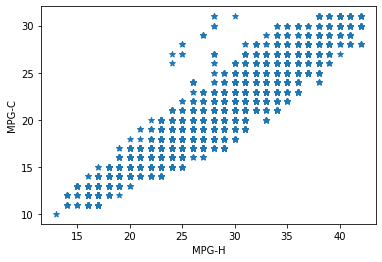

In [29]:
plt.scatter(car_feature_data['MPG-H'],car_feature_data['MPG-C'],marker='*')
plt.xlabel('MPG-H')
plt.ylabel('MPG-C')

Here we can see perfect relation ship between MPG-H and MPG-C, this gives a perfect trend for model fitting

**8.3.6 Car proportion**

Text(0, 0.5, 'Proportion')

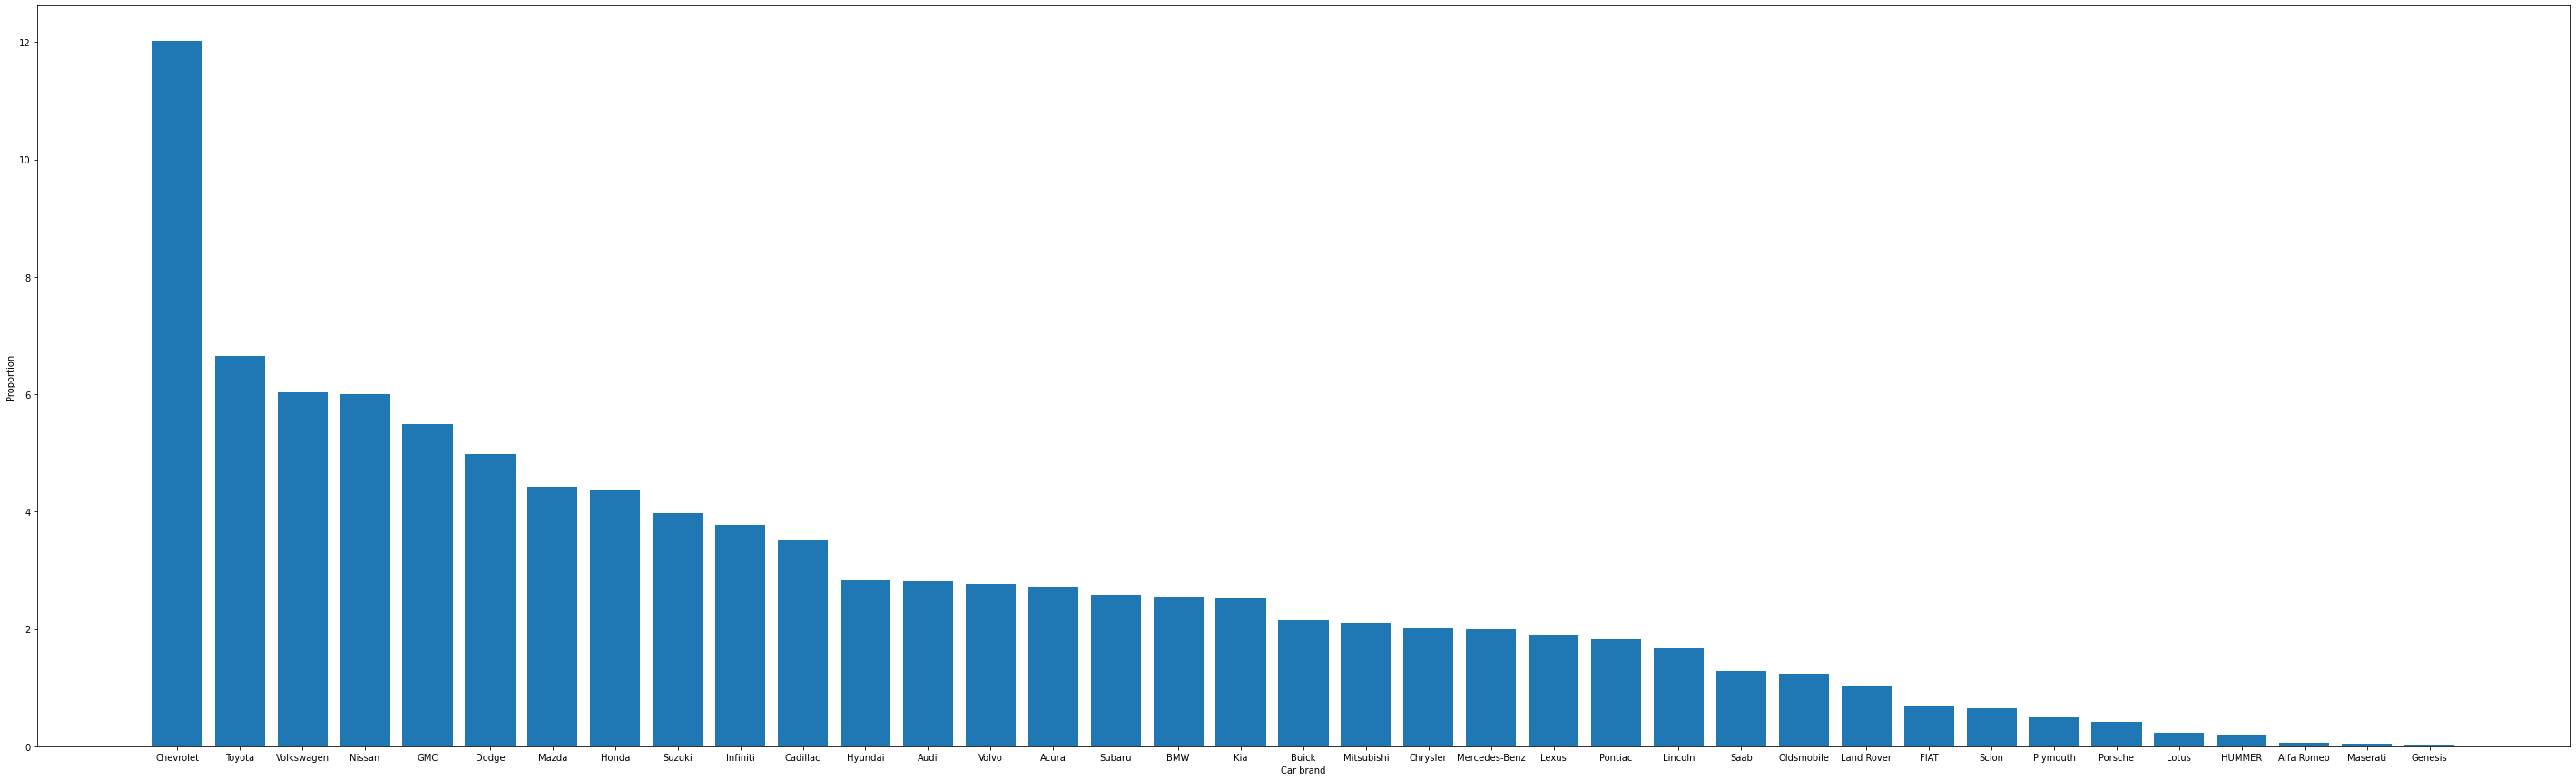

In [30]:
counts = car_feature_data_old['Make'].value_counts()*100/sum(car_feature_data_old['Make'].value_counts())
plt.figure(figsize=(50,15))
plt.bar(counts.index, height=counts)
plt.xlabel('Car brand')
plt.ylabel('Proportion')

From this we can see that top most represented brands takes more than half of the proportion

Graph for top 10 car proportion

Text(0, 0.5, 'Proportion')

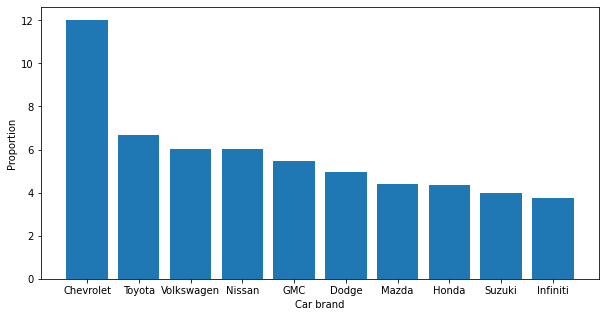

In [31]:
plt.figure(figsize=(10,5))
plt.bar(counts.index[:10], height=counts[:10])
plt.xlabel('Car brand')
plt.ylabel('Proportion')

**8.3.6 Engine cylinders histogram**

Text(0, 0.5, 'Nb of cars')

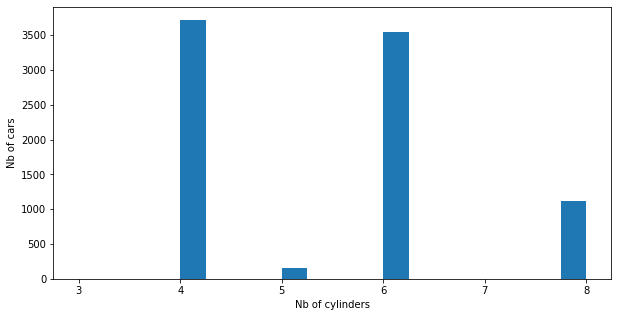

In [32]:
plt.figure(figsize=(10,5))
plt.hist(car_feature_data['Cylinders'].values, bins = 20)
plt.xlabel('Nb of cylinders')
plt.ylabel('Nb of cars')

This graph shows that most of the cars are produced with 4 and 6 cylinders

**8.3.7 Vehicle style bargraph**

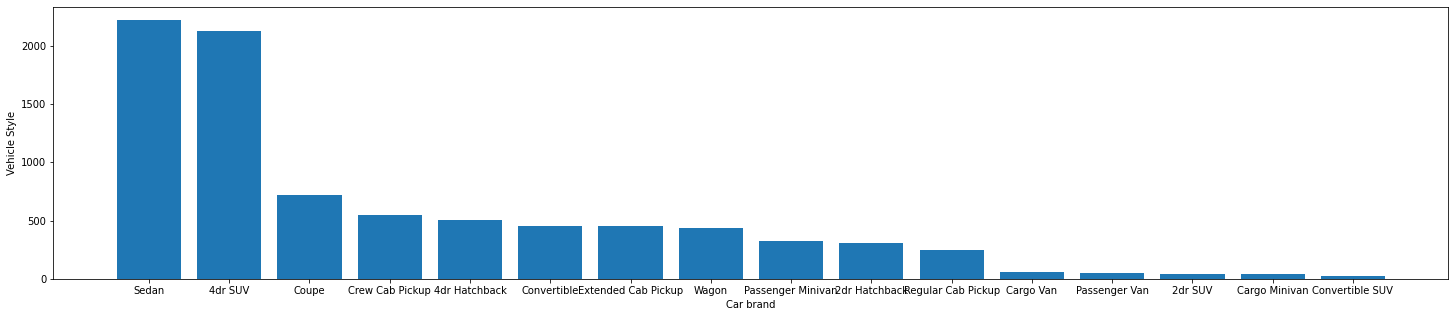

In [33]:
counts = car_feature_data_old['Vehicle Style'].value_counts()
plt.figure(figsize=(25,5))
plt.bar(counts.index, height=counts)
plt.xlabel('Car brand')
plt.ylabel('Vehicle Style')
del car_feature_data_old


From this graph we can analyse that Sedan and 4dr SUV are most produced Vehicle Style

## **9. Split and build Machine learning model**

**9.1 Split the dataset to train and test**

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data. The test dataset (or subset) in order to test our model’s prediction on this subset. We’ll do this using the Scikit-Learn library and specifically the train_test_split method. We'll split the dataset to 80 and 20 ratio. 

Before that we'll seperate the features and our targer variables from the dataset. We are building a model to predict the car prices, so we'll take Prices as our target variable


In [34]:
car_features = car_feature_data_scalled[:,:12]
car_prices = car_feature_data_scalled[:,12]

Now lets split our dataset to train and test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(car_features, car_prices, test_size=.20, random_state=42, shuffle = True)

The training set is a subset of the data set used to train a model.



1.   X_train is the training data set.
2.   y_train is the set of labels to all the data in X_train



The test set is a subset of the data set that you use to test your model 



1.   X_test is the test data set.
2.   y_test is the set of labels to all the data in X_test



**9.2 Build machine learning model**

Machine learning model is the output of a machine learning algorithm run on data.A model represents what was learned by a machine learning algorithm.
The model is the “thing” that is saved after running a machine learning algorithm on training data and represents the rules, numbers, and any other algorithm-specific data structures required to make predictions

To build a machine learning model there are many algorithms. The data scientist must be well avare that when to use which model such that the model makes a good fit

Here iam using RandomForestRegressor, random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees


In [36]:
rand_reg = RandomForestRegressor()


Here i'll use GridSearchCV from model selection of sklearn for Exhaustive search over specified parameter values for an estimator, this is a hyperparameter tuning technique which helps us to get perfect hyperparameter for the model

In [37]:
param_grid = { 
            "n_estimators": range(10,150,10),
            }

Here i'am checking for best n_estimators from 10 to 150 with the with a jump of 10

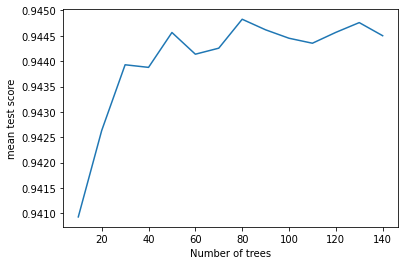

In [38]:
grid = GridSearchCV(rand_reg, param_grid,n_jobs=-1,cv=10)
grid.fit(X_train, y_train)
n_estimator_range = [i for i in range(10,150,10)]
mean_score = [score for score in grid.cv_results_['mean_test_score']]
plt.plot(n_estimator_range,mean_score)
plt.xlabel('Number of trees')
plt.ylabel('mean test score')
plt.show()

Observation:


*   Till 50 number of trees the model is doing realy well
*   After 50 number of trees we can see there are many ups and down in the graph
*   This says that our model will prone to overfitting after n_estimater > 50

*   So we will use n_estimators = 50 

GridSearchCV is one way of building a best model We can predict the y_test from the gird object of GridSearchCV and  GridSearchCV takes lot of computational time. 

So by ignoring GridSearchCV for now and taking  n_estimater = 50 i'll build a RandomForestRegressor model to get the best fit from scrach and also we'll check for other machine learning algorithms and check which model performs best.

**NOTE**:- Once we use Gridsearchcv there is no need of Building the RandomForestRegressor model or any other model again, grid object of GridSearchCV handle all the functionality. As the notebooks like google colab or jyupiter will take lot of time for Gridsearchcv operation it would be beter to comment out the Gridsearchcv part and continue with other algorithms ahead.

Before trying different algorithms, we'll see some important model evaluation metrics






In [39]:
y_pred = grid.predict(X_test)
print("Performance with RandomForestRegressor with n_estimators = 50 is ",grid.score(X_test,y_test))

Performance with RandomForestRegressor with n_estimators = 50 is  0.9510446433939072


From the above output we can see that our model fitted really well with RandomForestRegressor with n_estimators = 50, it gives performance with the test set in range of 94.8% to 95.2%



**9.2.1 R-square**

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

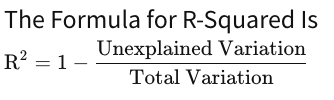

In [40]:
print('R-square score of the model is ',r2_score(y_test,y_pred)*100,"%")

R-square score of the model is  95.10446433939072 %


The higher the R-squared, the better the model fits your data, from the R-squared results we can say that our model is fitted very well

**9.2.2 Root Mean Square Error (RMSE)**

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.It is the standard deviation of the residuals. Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

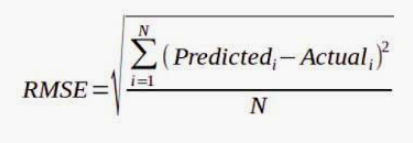

In [41]:
print('Root Mean Square Error (RMSE) of the model is ',np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Square Error (RMSE) of the model is  0.22301509727083546


Here we can get that our model has learnt the parameters with a small scale of error

**9.2.3 Mean Absolute Error**

MAE is simply the average absolute vertical or horizontal distance between each point in a scatter plot and the Y=X line. In other words, MAE is the average absolute difference between X and Y.

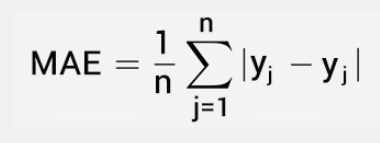

In [42]:
print('Mean Absolute Error of the model is :',mean_absolute_error(y_test,y_pred))

Mean Absolute Error of the model is : 0.15887307538182288


Here we can get that our model has learnt the parameters with a small scale of error

## **10 Try different algorithms and check their performance**

Now lets try fitting our model with different machine learning algorithms and find which algorithm gives a best fit for our dataset

**10.1 Support Vector Machine - Regression (SVR)**

Support Vector Machines (SVM) are popularly and widely used for classification problems in machine learning.It tries to find a line/hyperplane (in multidimensional space) that separates these two classes. Then it classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict

In [43]:
from sklearn.svm import SVR
SVM_reg = SVR()
SVM_reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = SVM_reg.predict(X_test)
print('The r-squared score of the SVR regressor is',r2_score(y_test,y_pred))
print('The Root mean squared error score of the SVR regressor is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean absolute error score of the SVR regressor is',mean_absolute_error(y_test,y_pred))
r2_score_SVR = r2_score(y_test,y_pred)


The r-squared score of the SVR regressor is 0.8777391236634394
The Root mean squared error score of the SVR regressor is 0.35243408771234486
The Mean absolute error score of the SVR regressor is 0.24274448895758752


Text(0, 0.5, 'Predicted values')

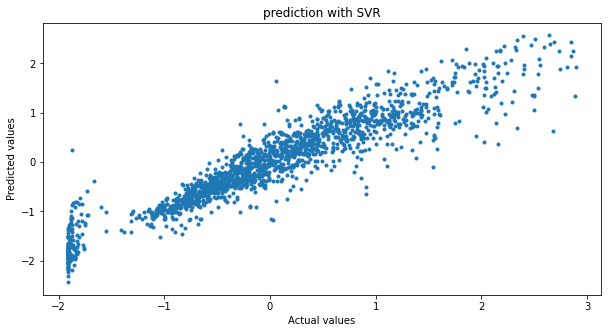

In [45]:
plt.figure(figsize = (10,5))
plt.scatter(y_test,y_pred,marker = '.')
plt.title('prediction with SVR')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0.5, 1.0, 'prediction with SVR')

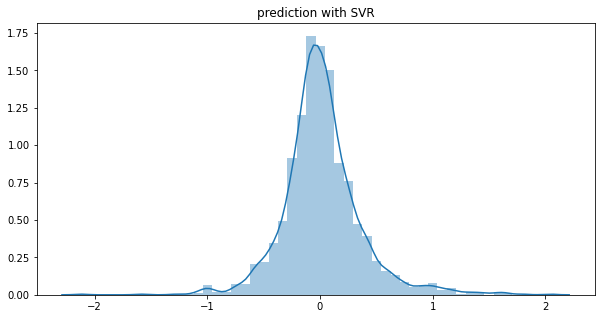

In [46]:
plt.figure(figsize = (10,5))
sns.distplot((y_test - y_pred),bins = 50)
plt.title('prediction with SVR')

The performance of our SVR model is quite good. The performance of 87.7% is quite reasonable.

From the graph we can check the residual, it says that our residuals or the errors are normally ditributed.

**10.2 DecisionTreeRegressor**

Decision Tree algorithm has become one of the most used machine .Decision trees are predictive models that use a set of binary rules to calculate a target value. Learning algorithm both in competitions like Kaggle as well as in business environment. Decision Tree can be used both in classification and regression problem

In [47]:
from sklearn.tree import DecisionTreeRegressor
deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
y_pred = deci_reg.predict(X_test)
print('The r-squared score of the DecisionTreeRegressor  is',r2_score(y_test,y_pred))
print('The Root mean squared error score of the DecisionTreeRegressor is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean absolute error score of the DecisionTreeRegressor is',mean_absolute_error(y_test,y_pred))
r2_score_Decision_tree = r2_score(y_test,y_pred)

The r-squared score of the DecisionTreeRegressor  is 0.9380318989051405
The Root mean squared error score of the DecisionTreeRegressor is 0.25091016092251156
The Mean absolute error score of the DecisionTreeRegressor is 0.1743223908174347


Text(0, 0.5, 'Predicted values')

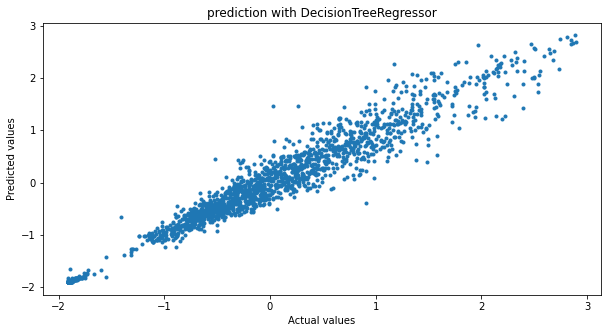

In [49]:
plt.figure(figsize = (10,5))
plt.scatter(y_test,y_pred,marker = '.')
plt.title('prediction with DecisionTreeRegressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0.5, 1.0, 'prediction with DecisionTreeRegressor')

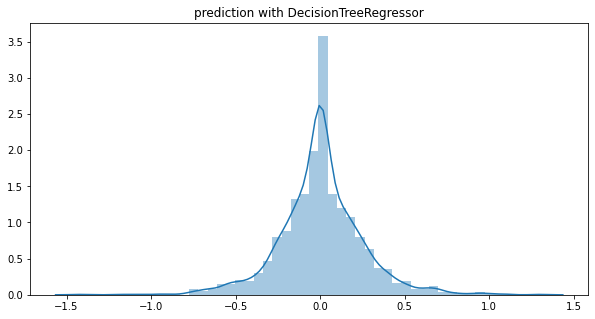

In [50]:
plt.figure(figsize = (10,5))
sns.distplot((y_test - y_pred),bins = 50)
plt.title('prediction with DecisionTreeRegressor')

Training our dataset with DecisionTreeRegressor helped our model performance. The performance is increased by 6% compared to Support Vector Regressor.

From the graph we can check the residual, it says that our residuals or the errors are more normally ditributed when compared to the SVR

**10.3 Lasso**

lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction performance and interpretability of the statistical model it produces.

In [51]:
from sklearn.linear_model import LassoCV
Lasso_reg = LassoCV()
Lasso_reg.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
y_pred = Lasso_reg.predict(X_test)
print('The r-squared score of the Lasso regressor is',r2_score(y_test,y_pred))
print('The Root mean squared error score of the Lasso regressor is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean absolute error score of the Lasso regressor is',mean_absolute_error(y_test,y_pred))
r2_score_Lasso = r2_score(y_test,y_pred)

The r-squared score of the Lasso regressor is 0.725328814152624
The Root mean squared error score of the Lasso regressor is 0.5282514601288935
The Mean absolute error score of the Lasso regressor is 0.40990123383084165


Text(0, 0.5, 'Predicted values')

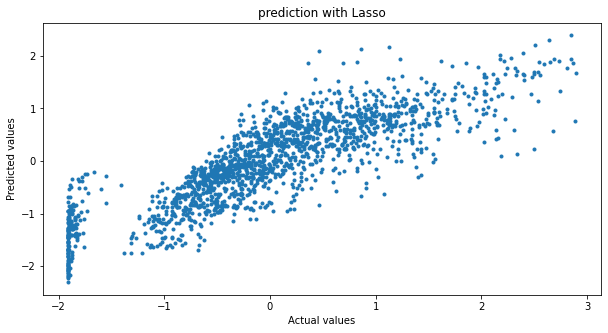

In [53]:
plt.figure(figsize = (10,5))
plt.scatter(y_test,y_pred,marker = '.')
plt.title('prediction with Lasso')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0.5, 1.0, 'prediction with Lasso')

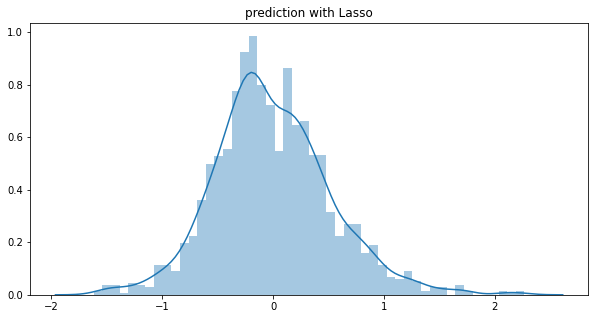

In [54]:
plt.figure(figsize = (10,5))
sns.distplot((y_test - y_pred),bins = 50)
plt.title('prediction with Lasso')

We can see that prediction with the Lasso algorithm was not quite good, the performance decreased to 72.5 %,

From the graph we can check the residual, it says that our residuals or the errors are not much normally ditributed, so we can conclude that Lasso is not the perfect algorithm for our model

**10.4 Random Forest Regression**

Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [55]:
from sklearn.ensemble import RandomForestRegressor
Randomforest_reg = RandomForestRegressor(n_estimators = 50)
Randomforest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred = Randomforest_reg.predict(X_test)
print('The r-squared score of the RandomForest regressor is',r2_score(y_test,y_pred))
print('The Root mean squared error score of the RandomForest regressor is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Mean absolute error score of the RandomForest regressor is',mean_absolute_error(y_test,y_pred))
r2_score_RandomForest = r2_score(y_test,y_pred)

The r-squared score of the RandomForest regressor is 0.9503605101615756
The Root mean squared error score of the RandomForest regressor is 0.22456796816717575
The Mean absolute error score of the RandomForest regressor is 0.1605999862251819


Text(0, 0.5, 'Predicted values')

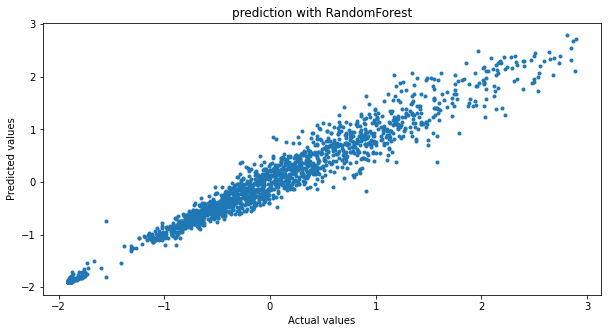

In [57]:
plt.figure(figsize = (10,5))
plt.scatter(y_test,y_pred,marker = '.')
plt.title('prediction with RandomForest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0.5, 1.0, 'prediction with RandomForest')

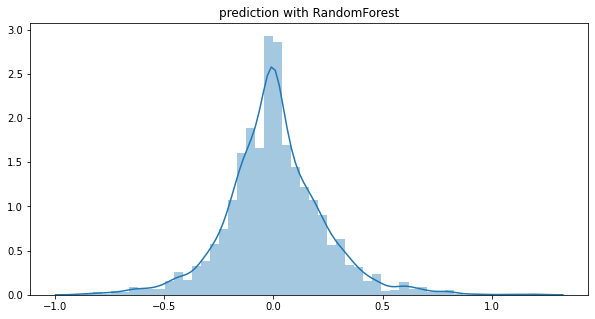

In [58]:
plt.figure(figsize = (10,5))
sns.distplot((y_test - y_pred),bins = 50)
plt.title('prediction with RandomForest')

We can that randon forest regressor algorithm made a best fit to our dataset compared to all other algorithms. Its performace was greater than 95%.

From the graph we can check the residual, it says that our residuals or the errors are more normally ditributed when compared to all other algorithms.

Lets analyse scores of every algorithms with the help of bar graph

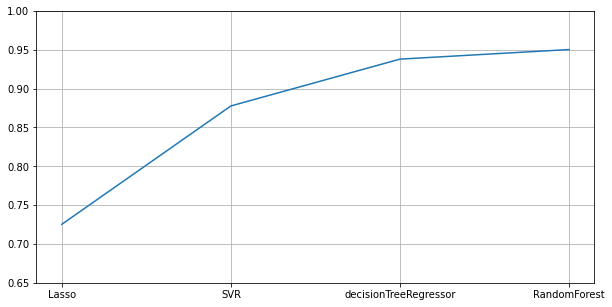

In [59]:
plt.figure(figsize = (10,5))
plt.ylim((0.65,1.0))
plt.plot(['Lasso','SVR','decisionTreeRegressor','RandomForest'],[r2_score_Lasso,r2_score_SVR,r2_score_Decision_tree,r2_score_RandomForest])
plt.grid(True)

From the above graph we can see that almost every algorithms performed well with out dataset. Performance of Lasso Regressor was lower compared to other algorithms, RandomForest algorithm gave the best performance compared to all other algorithms. So i would like to conclude that random forest regressor is beter algorithm for Car features and MSRP dataset